# Exercise 1

Work on this before the next lecture on 22 March. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/2). If you worked on things together with others please add their names to the notebook so we can see who formed groups.


## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.19), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2018/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2018".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. 

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

Train_size = 0.1 ; Test_size = 0.9
Train Score = 0.9
Test Score = 0.6527777777777778
 
Train_size = 0.15 ; Test_size = 0.85
Train Score = 0.9666666666666667
Test Score = 0.7588235294117647
 
Train_size = 0.2 ; Test_size = 0.8
Train Score = 0.9375
Test Score = 0.840625
 
Train_size = 0.25 ; Test_size = 0.75
Train Score = 0.93
Test Score = 0.82
 
Train_size = 0.3 ; Test_size = 0.7
Train Score = 0.9166666666666666
Test Score = 0.8107142857142857
 
Train_size = 0.35000000000000003 ; Test_size = 0.6499999999999999
Train Score = 0.9142857142857143
Test Score = 0.8576923076923076
 
Train_size = 0.4 ; Test_size = 0.6
Train Score = 0.91875
Test Score = 0.8625
 
Train_size = 0.45 ; Test_size = 0.55
Train Score = 0.9444444444444444
Test Score = 0.8136363636363636
 
Train_size = 0.5 ; Test_size = 0.5
Train Score = 0.93
Test Score = 0.81
 
Train_size = 0.55 ; Test_size = 0.44999999999999996
Train Score = 0.9227272727272727
Test Score = 0.8444444444444444
 
Train_size = 0.6 ; Test_size = 0.4
Train S

/Users/pietrzyk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


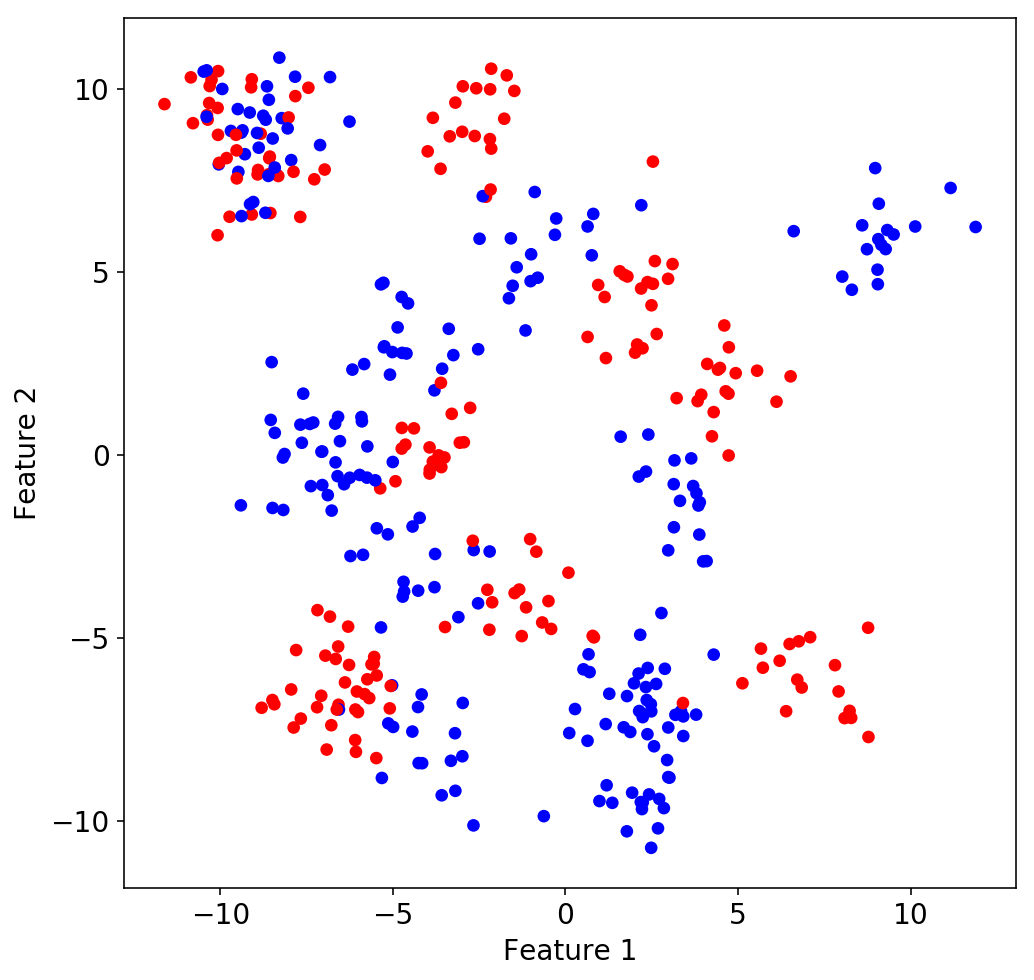

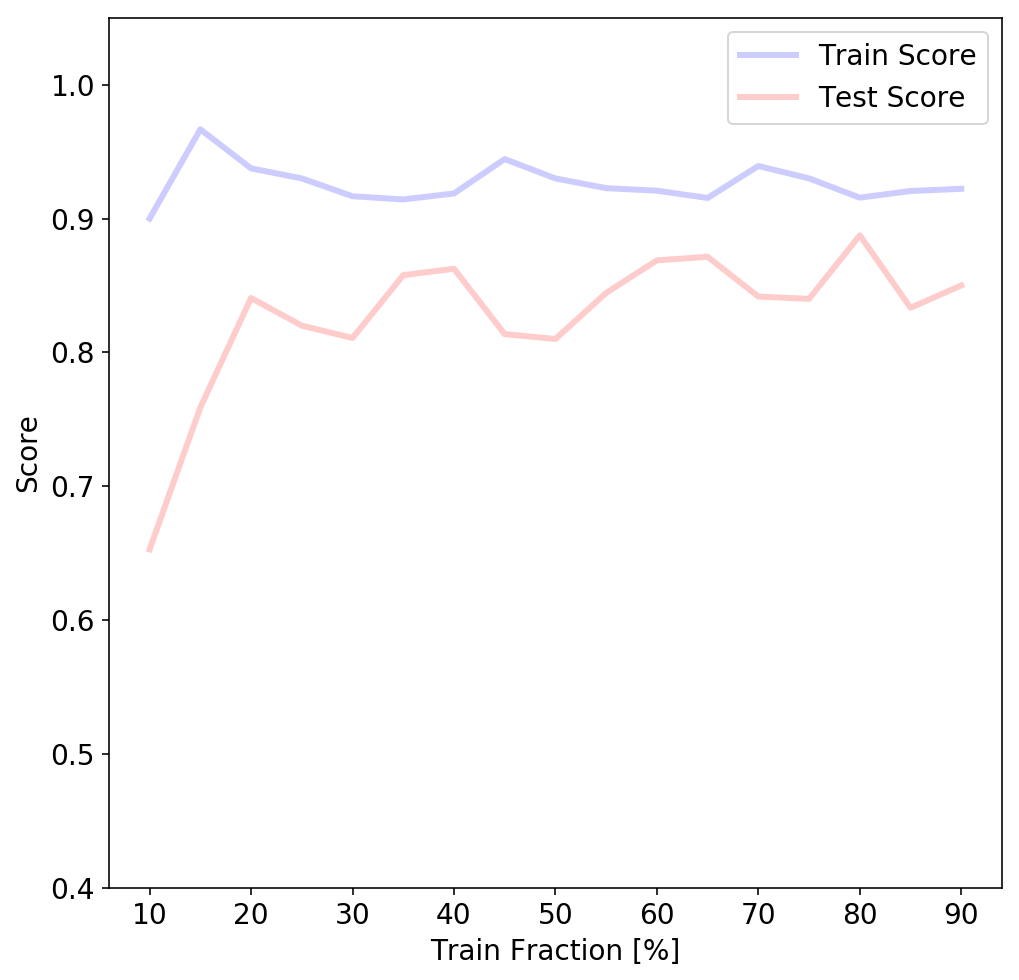

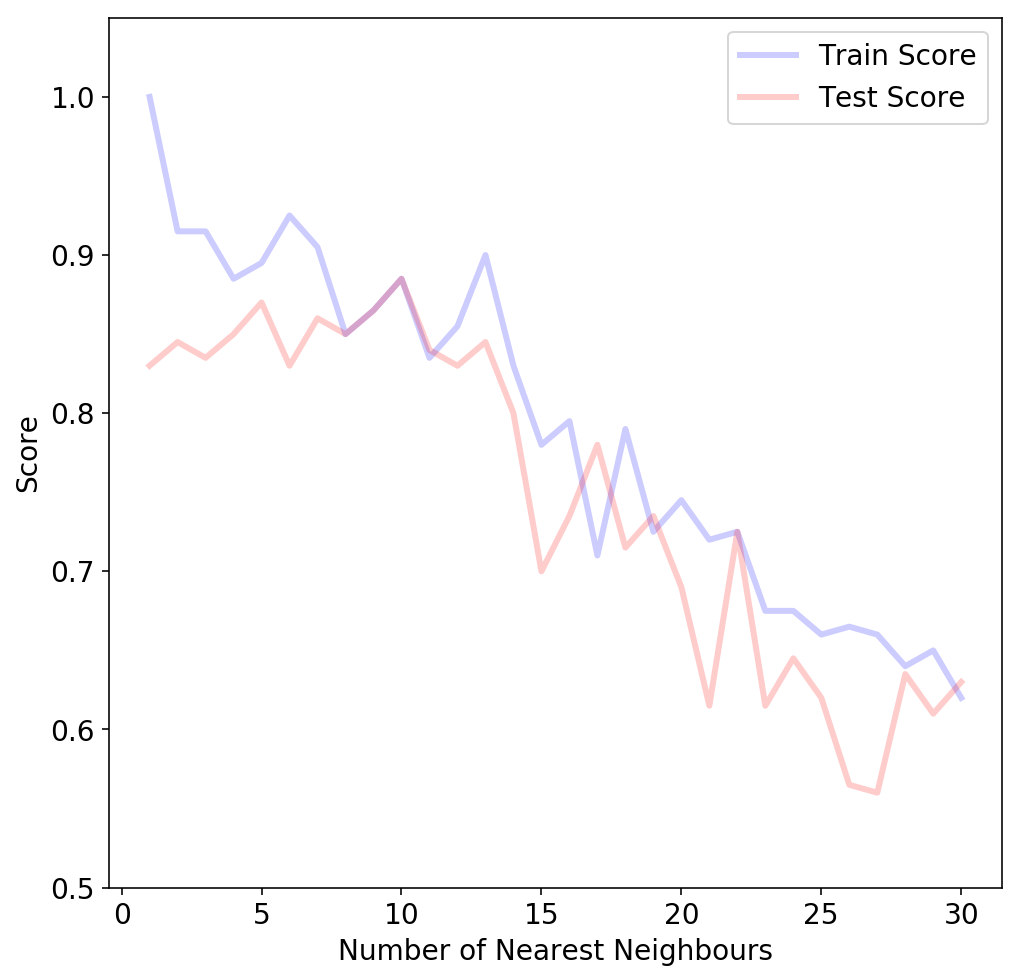

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from utils import plot_surface
from sklearn.utils import check_random_state
from sklearn.datasets import make_blobs

np.random.seed(123)
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

labels = ["b", "r"]
N = []
train_score_tab =[]
test_score_tab = []
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
for n in range (10,95,5):
    print ("Train_size = " + repr(0.01*n) + " ; Test_size = " + repr(1.0-0.01*n))
    X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.01*n)
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    #clf.fit(X_test, y_test)
    test_score = clf.score(X_test, y_test)
    N.append(n)
    train_score_tab.append(train_score)
    test_score_tab.append(test_score)
    print("Train Score = " + repr(train_score))
    print("Test Score = " + repr(test_score))
    print (" ")
    
plt.figure(2)
train_plot = plt.plot(N, train_score_tab, c='b', alpha=0.2, lw=3, label="Train Score")
test_plot = plt.plot(N, test_score_tab, c='r', alpha=0.2, lw=3, label="Test Score")
plt.xlabel('Train Fraction [%]')
plt.ylabel('Score')
plt.ylim((0.4, 1.05));
plt.legend(loc='best')


K = []
train_score_tab_k =[]
test_score_tab_k = []

for k in range (1,31,1):
    print ("Number of Nearest Neighbours = " + repr(k))
    X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.5)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    #clf.fit(X_test, y_test)
    test_score = clf.score(X_test, y_test)
    K.append(k)
    train_score_tab_k.append(train_score)
    test_score_tab_k.append(test_score)
    print("Train Score = " + repr(train_score))
    print("Test Score = " + repr(test_score))
    print (" ")
    
plt.figure(3)
train_plot_k = plt.plot(K, train_score_tab_k, c='b', alpha=0.2, lw=3, label="Train Score")
test_plot_k = plt.plot(K, test_score_tab_k, c='r', alpha=0.2, lw=3, label="Test Score")
plt.xlabel('Number of Nearest Neighbours')
plt.ylabel('Score')
plt.ylim((0.5, 1.05));
plt.legend(loc='best')  


First Question: I decided to split my data into 50% Train and 50% Test since I do not know what to start with. I also use k=3

The best way to split my data would be to have a train size bigger than 20%. After 20% the scores of the train and test samples reach a plateau.

The test score is always smaller than the train score. This is because the test score is computed from scores on the train sample. The test sample is then biased when its score is computed. 

Concerning the score as a function of the number of nearest neighbours, we fix the test and train samples to 50%. Overall, the test score is smaller than the train score but they stay quite similar. The train score always decreases with the number of nearest neighbours, whereas the test score has a small increase between 1 and 8 and then decreases. 

The classifier for 4 is more complicated since the complexity is inversely proportional to k.

The best setting is k=10 since the test score is the highest and the train score is close to the test score. By changing the seed we can get different results but the best setting is often close to 10. 


---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [4]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

Number of Neighbours = 1
Train Score = 1.0
Test Score = 0.7913933697680331
Mean Squared Error (Train) = 0.0
Mean Squared Error (Test) = 1.6839179254869372
 
Number of Neighbours = 2
Train Score = 0.9437189014479905
Test Score = 0.8561684105630417
Mean Squared Error (Train) = 0.37631368132756443
Mean Squared Error (Test) = 1.1966314200387753
 
Number of Neighbours = 3
Train Score = 0.9235015170023068
Test Score = 0.8453847216622558
Mean Squared Error (Train) = 0.5191684948577491
Mean Squared Error (Test) = 1.1837792071741033
 
Number of Neighbours = 4
Train Score = 0.9192196539172421
Test Score = 0.8521742313055706
Mean Squared Error (Train) = 0.7028016771541731
Mean Squared Error (Test) = 0.8666004862563493
 
Number of Neighbours = 5
Train Score = 0.9140646256367213
Test Score = 0.8642278000955643
Mean Squared Error (Train) = 0.6950504609990565
Mean Squared Error (Test) = 0.8833724156213539
 
Number of Neighbours = 6
Train Score = 0.8956915490168242
Test Score = 0.8868657162602815
Mean

/Users/pietrzyk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


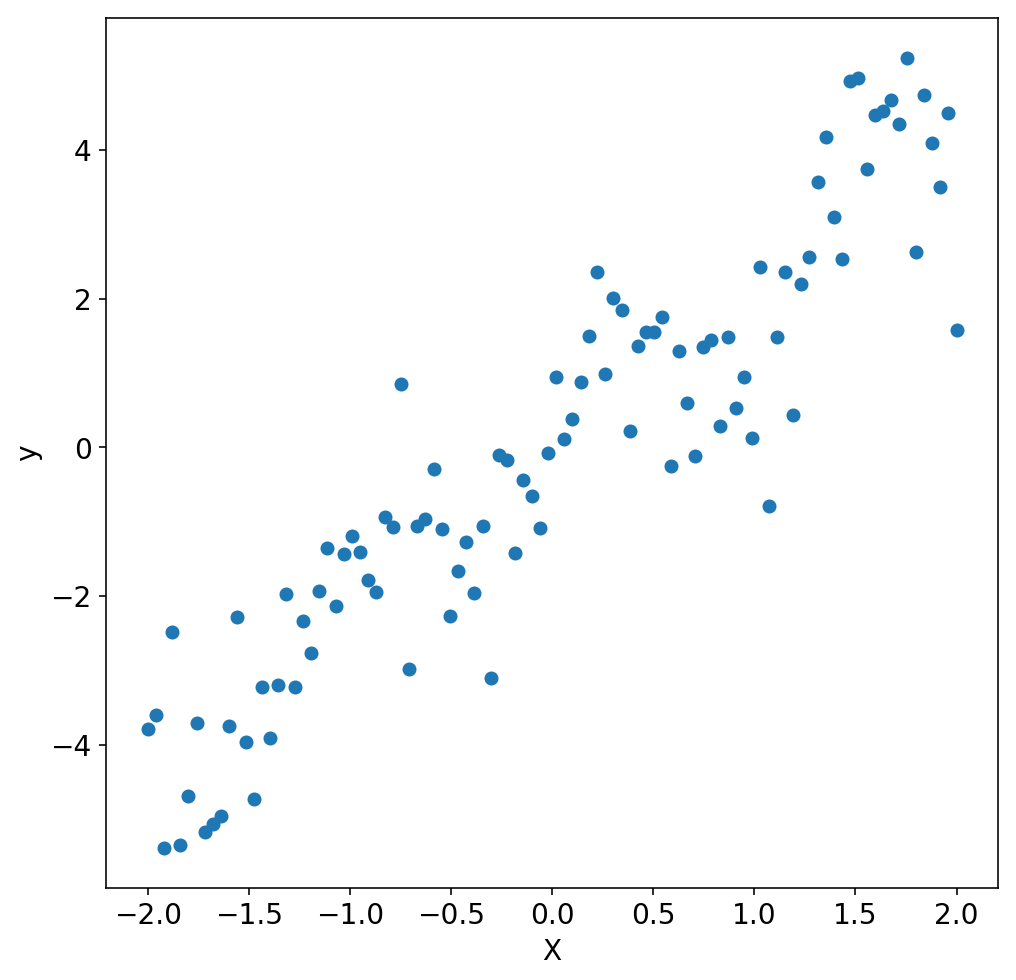

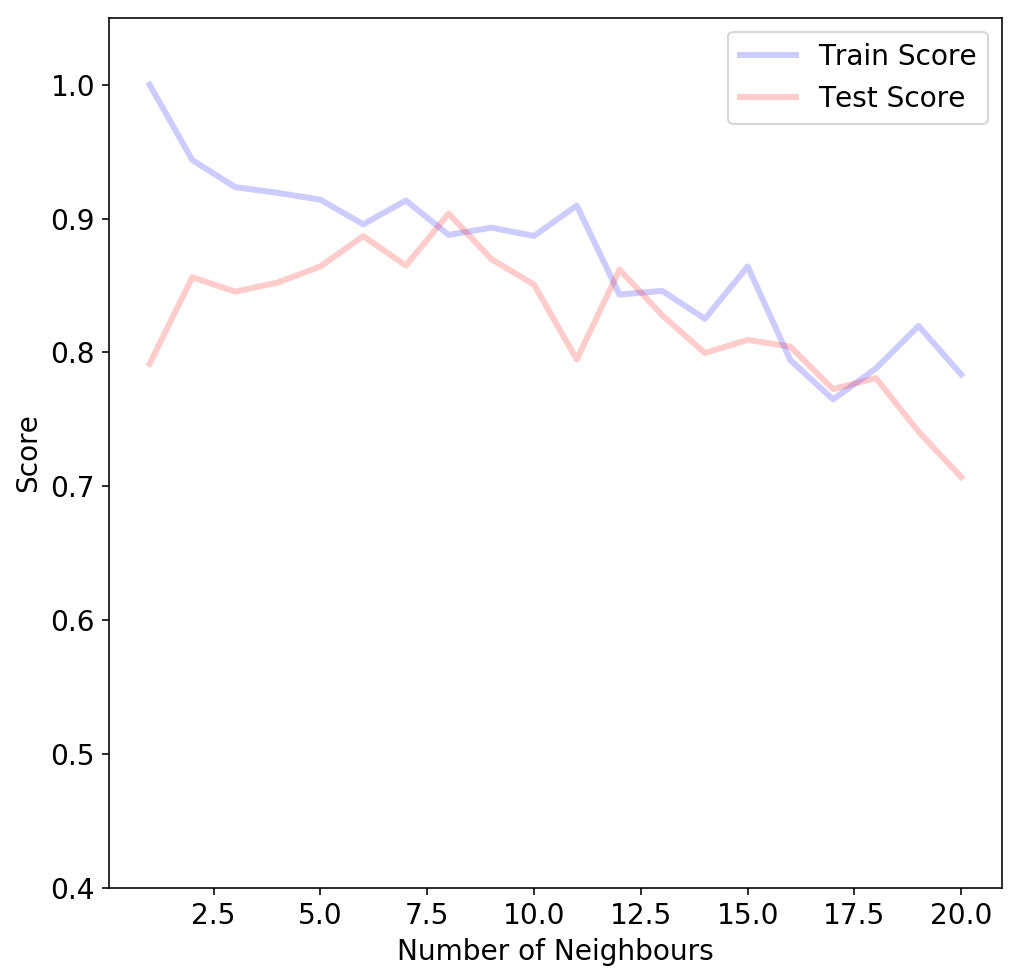

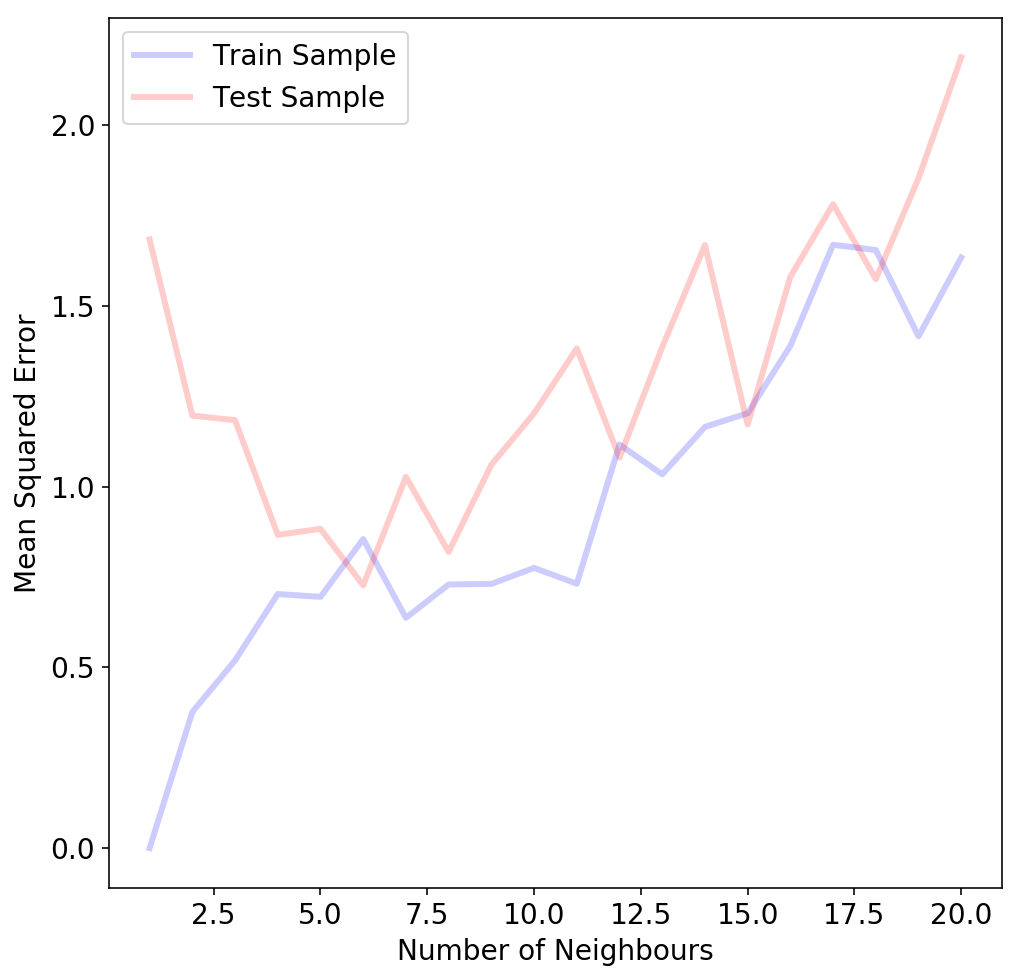

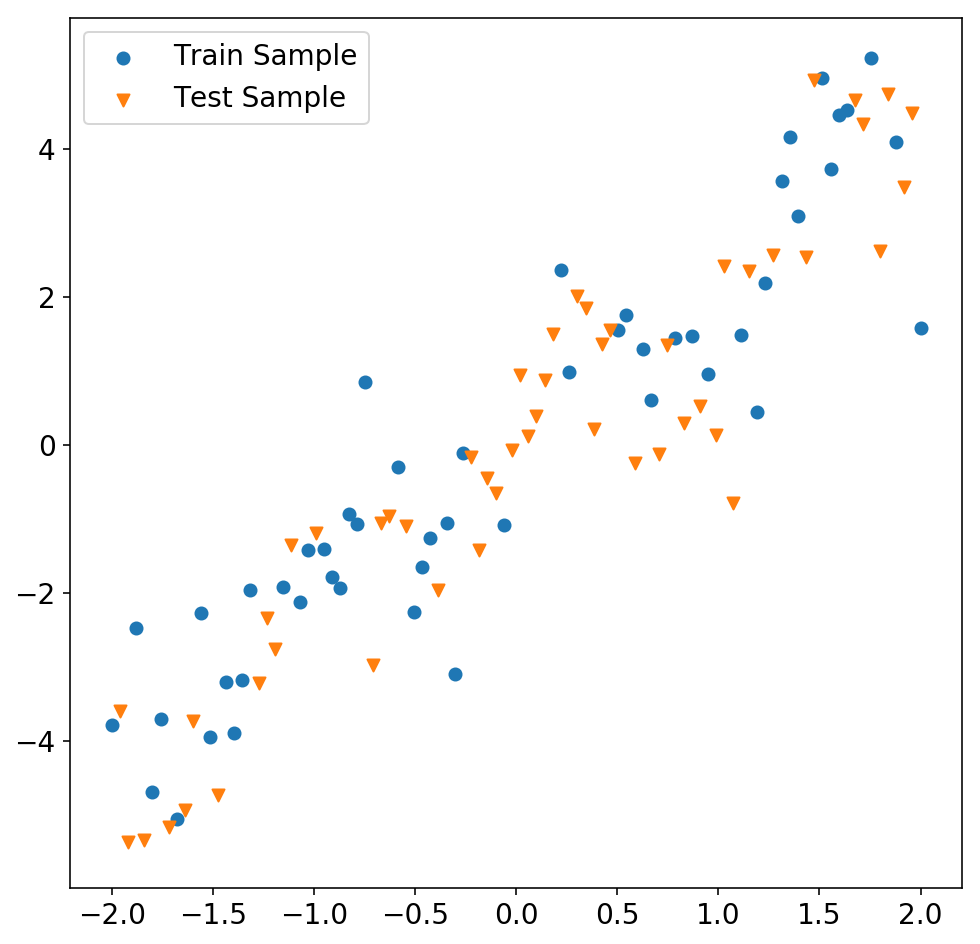

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from utils import plot_surface
from sklearn.utils import check_random_state
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(123)
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
line = np.linspace(-2, 2, 100).reshape(-1, 1)

def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    return X.reshape(-1, 1), y

X, y = make_regression(n_samples=100, noise_level=0.8, random_state=2)
plt.figure(1)
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")

N = []
train_score_tab =[]
test_score_tab = []
MSE_train_tab = []
MSE_test_tab = []

for n in range(1,21,1):
    N.append(n)
    print("Number of Neighbours = " + repr(n))
    X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.5)
    rgr = KNeighborsRegressor(n_neighbors=n)
    rgr.fit(X_train, y_train)  
    train_score = rgr.score(X_train, y_train)
    test_score = rgr.score(X_test, y_test)
    MSE_train = mean_squared_error(y_train,rgr.predict(X_train))
    MSE_test = mean_squared_error(y_test,rgr.predict(X_test))
    train_score_tab.append(train_score)
    test_score_tab.append(test_score)
    MSE_train_tab.append(MSE_train)
    MSE_test_tab.append(MSE_test)
    print("Train Score = " + repr(train_score))
    print("Test Score = " + repr(test_score))
    print("Mean Squared Error (Train) = " + repr(MSE_train))
    print("Mean Squared Error (Test) = " + repr(MSE_test))
    print (" ")
    

plt.figure(2)
train_plot = plt.plot(N, train_score_tab, c='b', alpha=0.2, lw=3, label="Train Score")
test_plot = plt.plot(N, test_score_tab, c='r', alpha=0.2, lw=3, label="Test Score")
plt.xlabel('Number of Neighbours')
plt.ylabel('Score')
plt.ylim((0.4, 1.05));
plt.legend(loc='best')

plt.figure(3)
MSE_train_plot = plt.plot(N, MSE_train_tab, c='b', alpha=0.2, lw=3, label="Train Sample")
MSE_test_plot = plt.plot(N, MSE_test_tab, c='r', alpha=0.2, lw=3, label="Test Sample")
plt.xlabel('Number of Neighbours')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')

################## JUST TO HAVE A LOOK OF OUR SPLIT ######################################

plt.figure(10)
plt.scatter(X_train,y_train,marker="o",label="Train Sample")
plt.scatter(X_test,y_test,marker="v",label="Test Sample")
plt.legend(loc='best')


The test score is always smaller that the train score. The train decreases while the test score begins with a plateau and then decreases. 

the MSE of the test sample begins higher than the one of the train sample. Both then converge and reach similar values with the train MSE being smaller than the test MSE. 

The best value of k is around 8. 

I do not see that the MSE of the training dataset plateaus between 5 and 15 but between 5 and 10. This is because we are close to the ultimate setting of k=8. This shows the robustness of the regressor. 

---

## Question 3

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about what method you could use to increase the complexity of a logistic regression model. Visualise the classification accuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

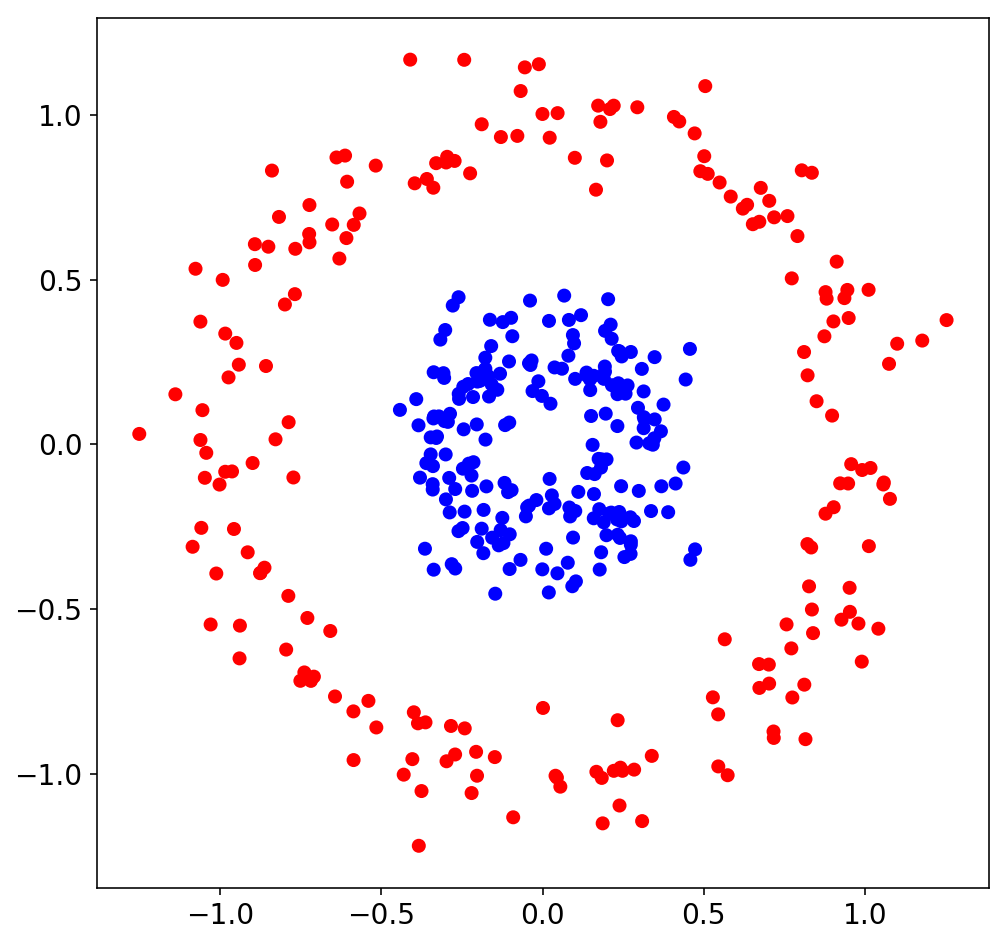

In [6]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

/Users/pietrzyk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


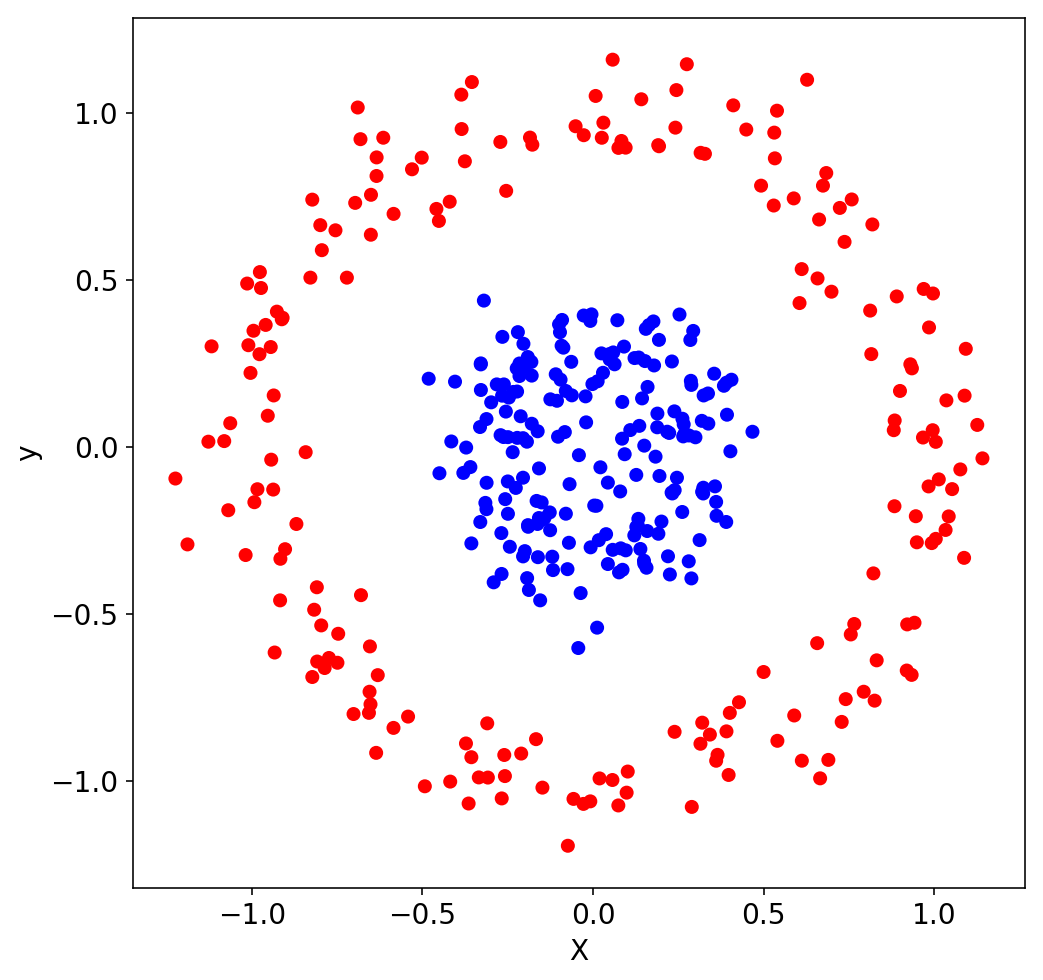

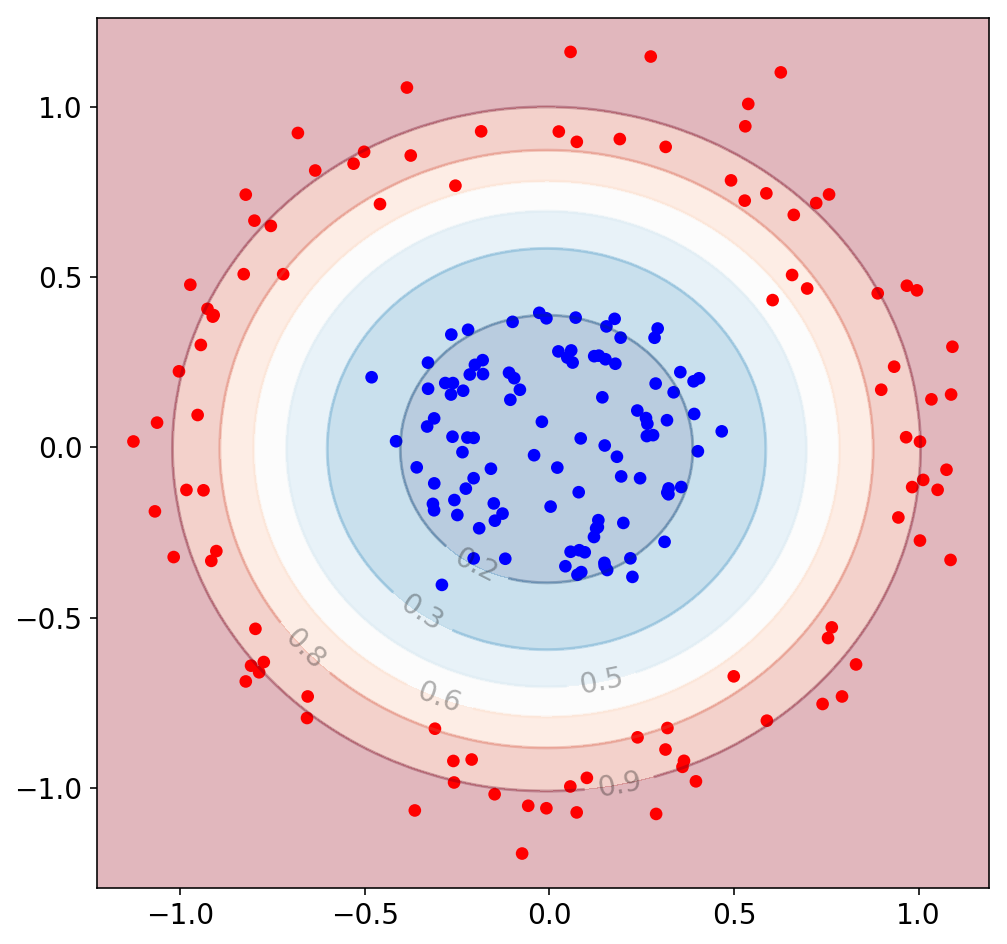

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import check_random_state
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def surface_plot_m(Classifier,X,y,Plot=plt,boundary=False,offset=0.7):
    
    x1_min, x1_max = X[:, 0].min() - offset, X[:, 0].max() + offset
    x2_min, x2_max = X[:, 1].min() - offset, X[:, 1].max() + offset
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    
    Plot.xlim(xx1.min(), xx1.max())
    Plot.ylim(xx2.min(), xx2.max())
    
    ax = Plot.gca()
    Z = Classifier.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:, 1]
    Z = Z.reshape(xx1.shape)
    cs = ax.contourf(xx1, xx2, Z, cmap='RdBu_r', alpha=.3)
    cs2 = ax.contour(xx1, xx2, Z, cmap='RdBu_r', alpha=.3)
    Plot.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)
    
    Plot.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
    
    #Plot the boudary
    if boundary:
        plot_decision_boundary(Classifier,X,Plot)

def plot_c_boundary(Classifier,X,Plot=plt):
    
    beta00 = Classifier.coef_[0,0]
    beta10 = Classifier.coef_[0,1]
    beta01 = Classifier.coef_[0,2]
    beta20 = Classifier.coef_[0,3]
    beta11 = Classifier.coef_[0,4]
    beta02 = Classifier.coef_[0,5]
    beta0 = Classifier.intercept_
    
    x1_min, x1_max = X[:, 0].min() - .2, X[:, 0].max() + .2
    x2_min, x2_max = X[:, 1].min() - .2, X[:, 1].max() + .2
    x1 = np.linspace(x1_min, x1_max, 1000).reshape(-1, 1)
    x2 = np.linspace(x2_min, x2_max, 1000).reshape(-1, 1)
    
    
    X1,X2 = np.meshgrid(x1,x2)
    F = beta0 + beta00 + beta10*X1 + beta01*X2 + beta20*X1**2 + beta11*X1*X2 + beta02*X2**2
    Plot.contour(X1,X2,F,[0],label="Boundary",linewidths=3)


np.random.seed(123)
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
line = np.linspace(-2, 2, 100).reshape(-1, 1)

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.figure(1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("X")
plt.ylabel("y")


X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.5)
poly = PolynomialFeatures(degree=2,interaction_only=False)
lgr = LogisticRegression(C=1)
pipeline = Pipeline([("polynomial_feature",poly),("logistic_regression",lgr)])
pipeline.fit(X_train,y_train)

plt.figure(2)
surface_plot_m(pipeline,X_train,y_train,offset=0.1)    